# Github link
### https://github.com/chandrakantpandit/Telco-Churn-Logistic-Regression.git

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Data Exploration and Cleanup

In [2]:
# There are some blanks in TotalCharges
telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=' ')

In [3]:
telco_data.shape

(7043, 21)

In [4]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
#Based on data senior citizen is boolean (0/1) hence we need convert into categorical data
telco_data['SeniorCitizen']=pd.Categorical(telco_data['SeniorCitizen'])

In [7]:
#check for null values in each columns
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Customer ID is not a criteria to decide the churn hence we can drop the column
del telco_data["customerID"] # Deleting the custumerID column
# also drop the NA value
telco_data = telco_data.dropna()

In [9]:
telco_data.shape
telco_data.dtypes

(7032, 20)

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

# Data Visualization

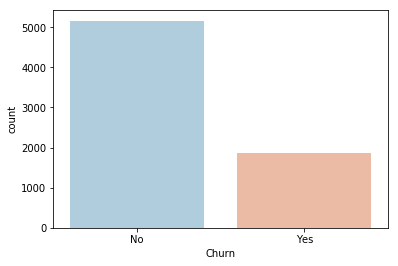

In [10]:
# Check the churn split in the data
sns.countplot(x='Churn',data=telco_data,palette='RdBu_r')

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

(array([ 1180.,   193.,   227.,    83.,    42.,    66.,    88.,   145.,
          132.,   288.,   185.,   164.,   218.,   128.,   126.,   376.,
          294.,   224.,   429.,   283.,   240.,   367.,   295.,   207.,
          325.,   250.,   183.,   166.,    76.,    52.]),
 array([  18.25,   21.6 ,   24.95,   28.3 ,   31.65,   35.  ,   38.35,
          41.7 ,   45.05,   48.4 ,   51.75,   55.1 ,   58.45,   61.8 ,
          65.15,   68.5 ,   71.85,   75.2 ,   78.55,   81.9 ,   85.25,
          88.6 ,   91.95,   95.3 ,   98.65,  102.  ,  105.35,  108.7 ,
         112.05,  115.4 ,  118.75]),
 <a list of 30 Patch objects>)

Text(0.5,0,'Monthly Charges')

Text(0,0.5,'Count')

(array([ 1525.,   672.,   512.,   458.,   454.,   316.,   276.,   201.,
          194.,   170.,   179.,   159.,   147.,   162.,   145.,   136.,
          159.,   117.,   121.,   146.,   128.,   108.,   102.,   100.,
           83.,    74.,    66.,    64.,    36.,    22.]),
 array([   18.8       ,   307.66666667,   596.53333333,   885.4       ,
         1174.26666667,  1463.13333333,  1752.        ,  2040.86666667,
         2329.73333333,  2618.6       ,  2907.46666667,  3196.33333333,
         3485.2       ,  3774.06666667,  4062.93333333,  4351.8       ,
         4640.66666667,  4929.53333333,  5218.4       ,  5507.26666667,
         5796.13333333,  6085.        ,  6373.86666667,  6662.73333333,
         6951.6       ,  7240.46666667,  7529.33333333,  7818.2       ,
         8107.06666667,  8395.93333333,  8684.8       ]),
 <a list of 30 Patch objects>)

Text(0.5,0,'Total Charges')

Text(0,0.5,'Count')

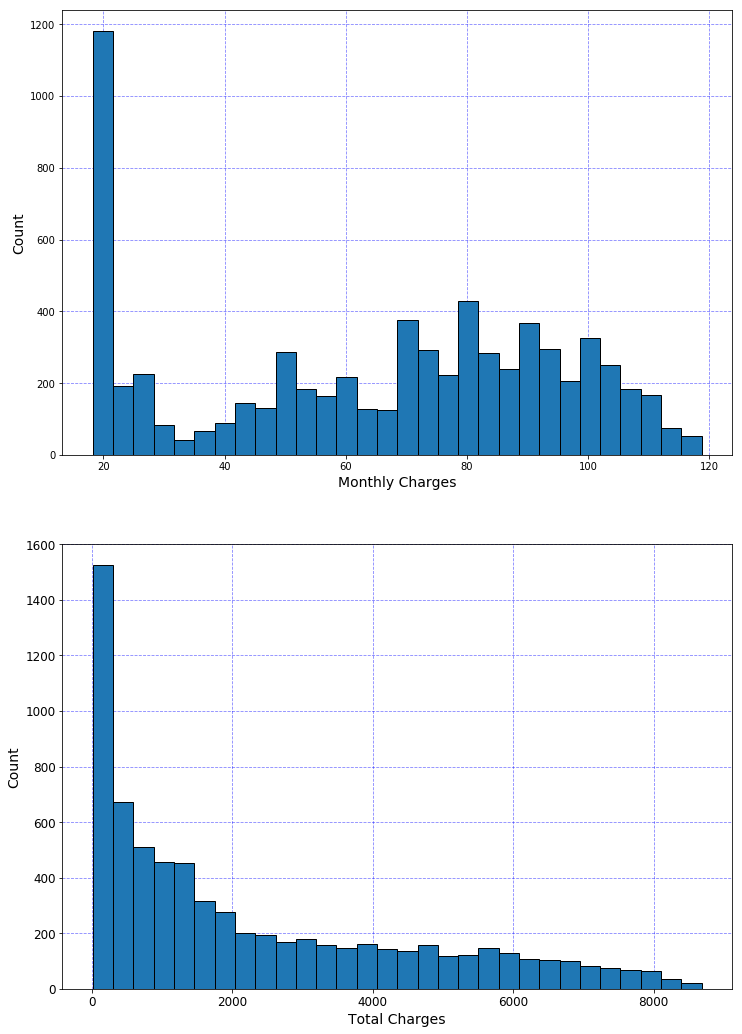

In [11]:
#plot the numeric data
fig, axes = plt.subplots(2,1, figsize=(12,18))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

axes[0].hist(telco_data['MonthlyCharges'],bins=30,edgecolor='black',linewidth=1.0)
axes[0].set_xlabel('Monthly Charges',fontsize=14)
axes[0].set_ylabel('Count',fontsize=14)
axes[0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.8,visible=True)
axes[0].set_axisbelow(True)

axes[1].hist(telco_data['TotalCharges'],bins=30,edgecolor='black',linewidth=1.0)
axes[1].set_xlabel('Total Charges',fontsize=14)
axes[1].set_ylabel('Count',fontsize=14)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.8,visible=True)
axes[1].set_axisbelow(True)

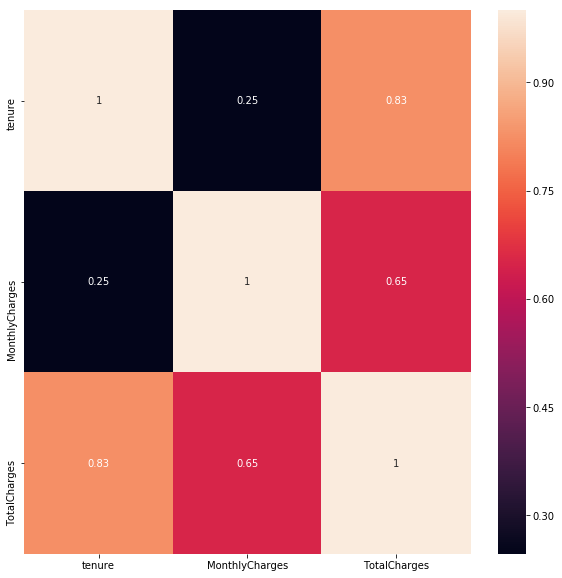

In [12]:
# Check the correlation
fig = plt.figure(figsize=(10,10))
sns.heatmap(telco_data.corr(),annot=True)

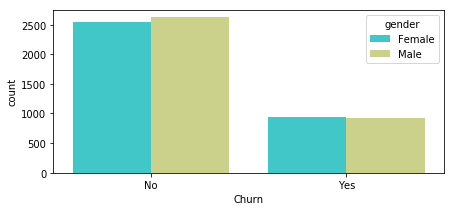

In [13]:
# Gender split
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x='Churn',hue='gender',data=telco_data,palette='rainbow')

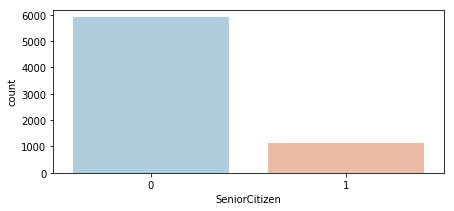

In [14]:
# Senior citizen split
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x="SeniorCitizen", data=telco_data, palette='RdBu_r')

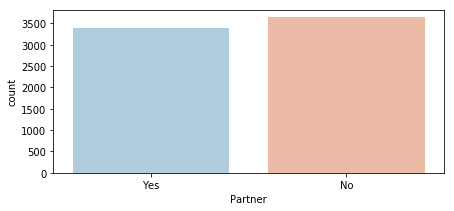

In [15]:
# partners split
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x="Partner", data=telco_data, palette='RdBu_r')

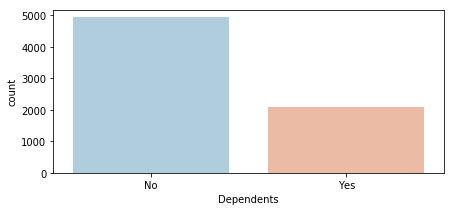

In [16]:
# Dependent citizen split
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x="Dependents", data=telco_data, palette='RdBu_r')

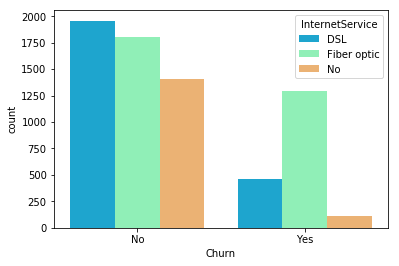

In [17]:
#Split based on internet service
sns.countplot(x='Churn',hue='InternetService',data=telco_data,palette='rainbow')

# Regression Analysis

In [18]:
#Create dummy variables
telco_dummy = pd.get_dummies(telco_data,drop_first=True)
telco_dummy.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [19]:
# Create dependent and independent data
X = telco_dummy.drop(['Churn_Yes','TotalCharges'],axis=1)
y = telco_dummy['Churn_Yes']

In [20]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state=1)

In [21]:
# Run the model on the training dataset
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
#predict the model
predict = logmodel.predict(X_test)
print(classification_report(y_test,predict))
print('Confusion Matrix = ')
print(confusion_matrix(y_test,predict))
print('Accuracy Score For Test Data: {:.4f}'.format(accuracy_score(y_test,predict)))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1734
          1       0.63      0.54      0.58       608

avg / total       0.79      0.80      0.79      2342

Confusion Matrix = 
[[1538  196]
 [ 281  327]]
Accuracy Score For Test Data: 0.7963


# Conclusion:

In [24]:
#The classifier made a total of 2342 predictions (e.g. 2342 cutsomers were being tested for the churn.
#In reality, 608 customer in the sample churned, and 1734  customer do not.
# Out of those 2342 cases, the classifier predicted "yes" 523 times, and "no" 1819 times.
# There are 477 misclassification.
# Also, the accuracy score is 79.6%, which is quiet good.